# Problem Statement

### *) A sizable department has to be maintained, for the purposes of recruiting new talent
### *) More often than not, the new employees have to be trained for the job and/or given time toacclimatize themselves to the company
### *) Hence, the management has contracted an HR analytics firm to understand what factors theyshould focus on, in order to curb attrition.
### *) In other words, they want to know what changes they should make to their workplace, in order toget most of their employees to stay.
### *) Also, they want to know which of these variables is most important and needs to be addressedright away

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [4]:
df.drop_duplicates()
df.dropna(inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 24 columns):
Age                        4382 non-null int64
Attrition                  4382 non-null object
BusinessTravel             4382 non-null object
Department                 4382 non-null object
DistanceFromHome           4382 non-null int64
Education                  4382 non-null int64
EducationField             4382 non-null object
EmployeeCount              4382 non-null int64
EmployeeID                 4382 non-null int64
Gender                     4382 non-null object
JobLevel                   4382 non-null int64
JobRole                    4382 non-null object
MaritalStatus              4382 non-null object
MonthlyIncome              4382 non-null int64
NumCompaniesWorked         4382 non-null float64
Over18                     4382 non-null object
PercentSalaryHike          4382 non-null int64
StandardHours              4382 non-null int64
StockOptionLevel           4382 non-n

In [6]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [7]:
df.mean()

Age                           36.933364
DistanceFromHome               9.198996
Education                      2.912369
EmployeeCount                  1.000000
EmployeeID                  2207.804884
JobLevel                       2.063898
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
StandardHours                  8.000000
StockOptionLevel               0.794614
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

In [9]:
df.median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
EmployeeCount                  1.0
EmployeeID                  2208.5
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StandardHours                  8.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [17]:
df1 = df[['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
          'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [18]:
df1.mode()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,2,3,1,23420,1.0,11,10.0,2,5,0,2


In [19]:
df.var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
EmployeeCount              0.000000e+00
EmployeeID                 1.617192e+06
JobLevel                   1.223490e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
StandardHours              0.000000e+00
StockOptionLevel           7.265814e-01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [20]:
df.skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
EmployeeCount              0.000000
EmployeeID                -0.002335
JobLevel                   1.021797
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
StandardHours              0.000000
StockOptionLevel           0.967263
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [21]:
df.std()

Age                            9.137272
DistanceFromHome               8.105396
Education                      1.024728
EmployeeCount                  0.000000
EmployeeID                  1271.688783
JobLevel                       1.106115
MonthlyIncome              47142.310175
NumCompaniesWorked             2.497832
PercentSalaryHike              3.663007
StandardHours                  0.000000
StockOptionLevel               0.852397
TotalWorkingYears              7.785717
TrainingTimesLastYear          1.289402
YearsAtCompany                 6.129351
YearsSinceLastPromotion        3.224994
YearsWithCurrManager           3.569674
dtype: float64

In [22]:
df.kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeCount              0.000000
EmployeeID                -1.198607
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

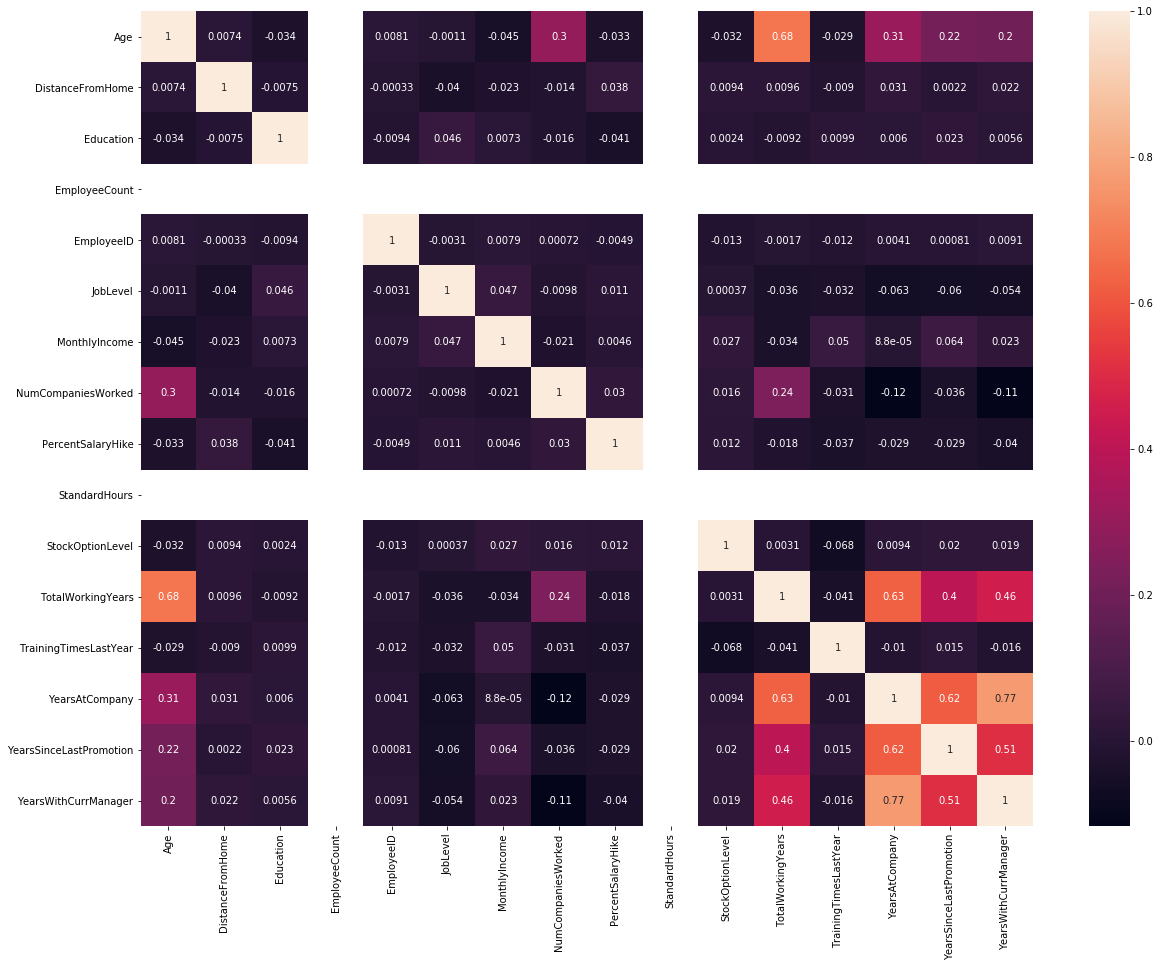

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [32]:
IQR = (df1.quantile(.75) - df1.quantile(.25))
IQR

Age                           13.0
DistanceFromHome              12.0
Education                      2.0
JobLevel                       2.0
MonthlyIncome              54680.0
NumCompaniesWorked             3.0
PercentSalaryHike              6.0
TotalWorkingYears              9.0
TrainingTimesLastYear          1.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        3.0
YearsWithCurrManager           5.0
dtype: float64

# Non Parametric Tests
## 1) Wilcoxon Paired test : 
### Used to compare two paired samples

In [34]:
df.Attrition.replace(to_replace  = ("No","Yes"),value = (0,1),inplace = True)

In [35]:
from scipy.stats import wilcoxon
stats, p = wilcoxon(df.Attrition, df.Age)
print(stats,p)

0.0 0.0


### p>0.05. So,there is significant impact of Age on Attrition

## 2) Friedman Test:
### It is used to compare more than two paired samples

In [36]:
from scipy.stats import friedmanchisquare
stats, p = friedmanchisquare(df.Attrition, df.Age, df.DistanceFromHome, df.MonthlyIncome )
print(stats,p)

13066.034511168058 0.0


### p>0.05. So,there is significant impact of Age,DistanceFromHome and MonthlyIncome on Attrition

## 3)Mann-Whitney Test:
### It is used to compare two independent samples

In [37]:
from scipy.stats import mannwhitneyu
stats , p = mannwhitneyu(df.Attrition, df.Education)
print(stats,p)

179070.0 0.0


### p>0.05. So,there is significant impact of Education on Attrition

## 4)Kruskal-Wallis Test:
### It is used to compare more than two independent samples

In [38]:
from scipy.stats import kruskal
stats , p = kruskal(df.Attrition, df.Education, df.JobLevel)
print(stats, p)

9131.468016589157 0.0


### p>0.05. So,there is significant impact of Education and Joblevel on Attrition

## 5)Chi Square Test:
### It is used to check the dependency of the variables and the variables should be categorical

In [39]:
from scipy.stats import chi2_contingency
chitable = pd.crosstab(df.Attrition, df.Department)
chitable

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,132,2416,1129
1,55,449,201


In [40]:
stats, p, dof, expected = chi2_contingency(chitable)
print(stats, p)

25.89432541916022 2.382970570769315e-06


### p<0.05. So, the variables are dependent.

# Parametric Tests
## 1)One Sample T Test:
### It is used to compare sample mean with the population mean

In [41]:
df["Attrition"].mean()

0.16088544043815609

In [42]:
from scipy.stats import ttest_1samp
stats, p = ttest_1samp(df.Attrition, 1000)
print(stats, p)

-180114.1152494154 0.0


### p>0.05. There is significant difference between the mean of attrition against population mean which is 1000

## 2)Two Sampled Paired T Test:
### It is used to compare mean of two paired samples

In [43]:
from scipy.stats import ttest_rel
stats, p = ttest_rel(df.Attrition, df.Age)
print(stats, p)

-264.51296221316437 0.0


### p<0.05. So, there is significant impact of Age  on Attrition

## 3)Two-Sample Independent T Test:
### It is used to compare the mean of two independent samples

In [44]:
from scipy.stats import ttest_ind
stats, p = ttest_ind(df.Attrition, df.Education)
print(stats, p)

-167.31137949760114 0.0


### p>0.05. So,there is significant impact of Education on Attrition

## Conclusion
### From the above obtained inferences based on the final heatmap it's clear that Company XYZ lags behind in serving their new employees and must draft some good policies for the employees that are young, unmarried and have just joined the aforesaid organization. Apart from that the main focus of the company should be on the Human Resource department as this department contributes for maximum attrition of the employees, discussion could be done with the employees at all levels of the department so as to understand and rectify the problems they are facing in a better way. Employees with frequent business travel history must be taken care of either by giving them some sort of emoluments or a means of good travel comforts needed to be provided as per their demands. So, Attrition in XYZ Company can be controlled by following above mentioned small measures and that may lead to the overall growth of the organization.